___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
import sklearn
sklearn.metrics.SCORERS.keys()
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score
from scipy.special import expit, logit
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df_copy = df.copy()
df_copy

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,...,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000
mean,2748.505,156.212,16.331,228.094,50.898,1719.967,212.370,218.511,134.503,1521.757,...,0.042,0.040,0.002,0.006,0.000,0.002,0.046,0.041,0.027,4.000
std,418.301,109.653,8.317,209.630,61.007,1330.818,30.655,22.681,46.034,1107.378,...,0.200,0.196,0.039,0.080,0.020,0.043,0.210,0.199,0.162,2.001
min,1859.000,0.000,0.000,0.000,-163.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2375.000,65.000,10.000,66.000,5.000,756.000,195.000,206.000,106.000,734.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2753.000,125.000,15.000,180.000,32.000,1318.000,220.000,222.000,137.000,1273.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,3108.000,260.000,22.000,330.000,79.000,2294.000,235.000,235.000,167.000,1998.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
max,3857.000,360.000,65.000,1390.000,598.000,7112.000,254.000,254.000,252.000,7150.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


In [6]:
df.nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [7]:
df_target = pd.DataFrame(df,columns=['Cover_Type'])
df_target.head(20)

,Cover_Type
0,6
1,1
2,7
3,5
4,7
5,2
6,6
7,3
8,7
9,4


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

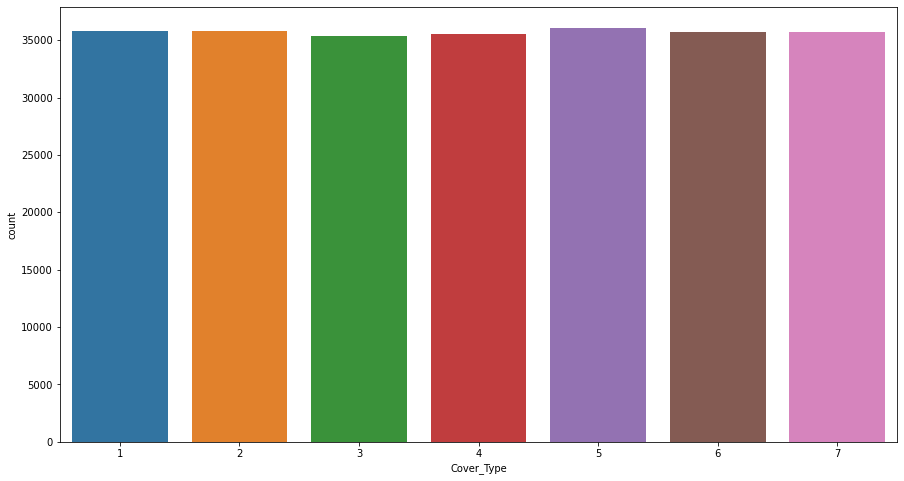

In [8]:
sns.countplot(df.Cover_Type)

In [9]:
from scipy.stats import skew
skew(df['Cover_Type'])

-0.0024434824820967708

In [10]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()

False

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [11]:
df.isnull().sum().sum()

0

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [12]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,...,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000
mean,2748.505,156.212,16.331,228.094,50.898,1719.967,212.370,218.511,134.503,1521.757,...,0.042,0.040,0.002,0.006,0.000,0.002,0.046,0.041,0.027,4.000
std,418.301,109.653,8.317,209.630,61.007,1330.818,30.655,22.681,46.034,1107.378,...,0.200,0.196,0.039,0.080,0.020,0.043,0.210,0.199,0.162,2.001
min,1859.000,0.000,0.000,0.000,-163.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2375.000,65.000,10.000,66.000,5.000,756.000,195.000,206.000,106.000,734.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2753.000,125.000,15.000,180.000,32.000,1318.000,220.000,222.000,137.000,1273.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,3108.000,260.000,22.000,330.000,79.000,2294.000,235.000,235.000,167.000,1998.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
max,3857.000,360.000,65.000,1390.000,598.000,7112.000,254.000,254.000,252.000,7150.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


In [13]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [14]:
# Slope outlier var gibi


<AxesSubplot:xlabel='Slope'>

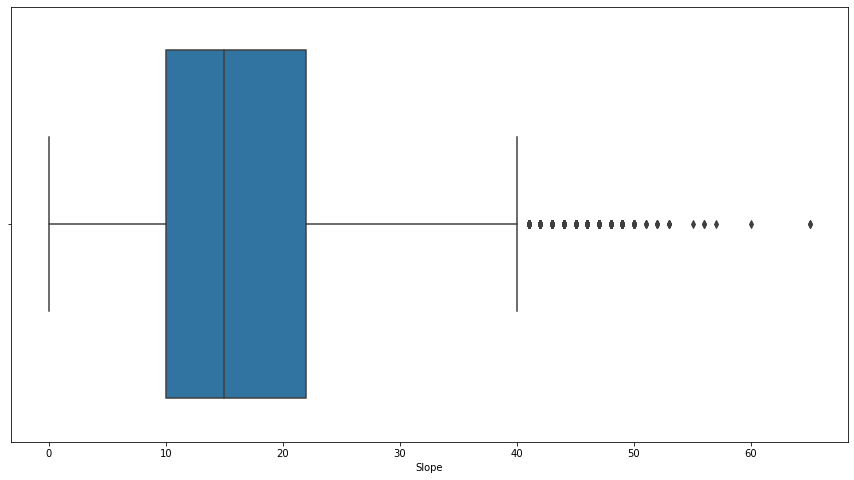

In [15]:
sns.boxplot(df['Slope'])

In [16]:
Q1 = df['Vertical_Distance_To_Hydrology'].quantile(0.25)
Q3 = df['Vertical_Distance_To_Hydrology'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Vertical_Distance_To_Hydrology'] >= lower_lim) & (df['Vertical_Distance_To_Hydrology'] <= upper_lim)
df = df[not_outlier]


In [17]:
Q1 = df['Slope'].quantile(0.25)
Q3 = df['Slope'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Slope'] >= lower_lim) & (df['Slope'] <= upper_lim)
df = df[not_outlier]

In [18]:
Q1 = df['Horizontal_Distance_To_Hydrology'].quantile(0.25)
Q3 = df['Horizontal_Distance_To_Hydrology'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Horizontal_Distance_To_Hydrology'] >= lower_lim) & (df['Horizontal_Distance_To_Hydrology'] <= upper_lim)
df = df[not_outlier]


In [19]:
Q1 = df['Horizontal_Distance_To_Roadways'].quantile(0.25)
Q3 = df['Horizontal_Distance_To_Roadways'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Horizontal_Distance_To_Roadways'] >= lower_lim) & (df['Horizontal_Distance_To_Roadways'] <= upper_lim)
df = df[not_outlier]

In [20]:
Q1 = df['Hillshade_9am'].quantile(0.25)
Q3 = df['Hillshade_9am'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Hillshade_9am'] >= lower_lim) & (df['Hillshade_9am'] <= upper_lim)
df = df[not_outlier]

In [21]:
Q1 = df['Hillshade_Noon'].quantile(0.25)
Q3 = df['Hillshade_Noon'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Hillshade_Noon'] >= lower_lim) & (df['Hillshade_Noon'] <= upper_lim)
df = df[not_outlier]

In [22]:
Q1 = df['Hillshade_3pm'].quantile(0.25)
Q3 = df['Hillshade_3pm'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Hillshade_3pm'] >= lower_lim) & (df['Hillshade_3pm'] <= upper_lim)
df = df[not_outlier]

In [23]:
Q1 = df['Horizontal_Distance_To_Fire_Points'].quantile(0.25)
Q3 = df['Horizontal_Distance_To_Fire_Points'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
not_outlier = (df['Horizontal_Distance_To_Fire_Points'] >= lower_lim) & (df['Horizontal_Distance_To_Fire_Points'] <= upper_lim)
df = df[not_outlier]

<AxesSubplot:xlabel='Slope'>

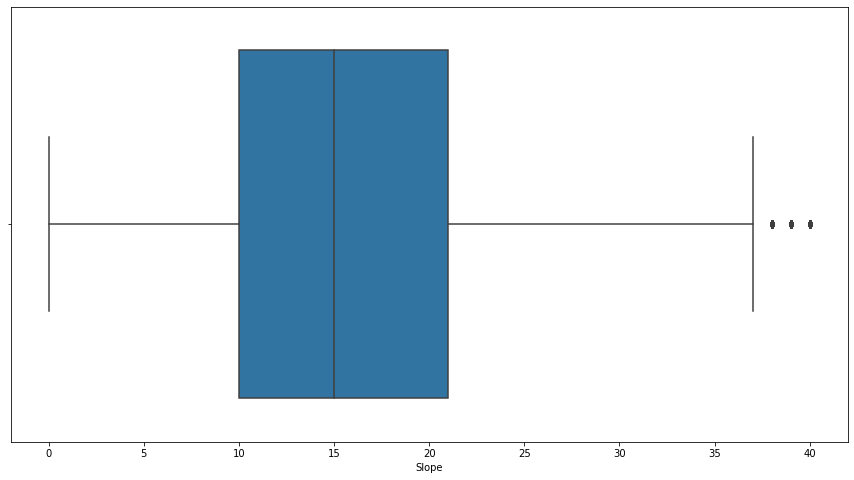

In [24]:
sns.boxplot(df['Slope'])

In [25]:
# for column in df_copy:
#     Q1 = df_copy[column].quantile(0.25)
#     Q3 = df_copy[column].quantile(0.25)
#     IQR = Q3-Q1
#     upper_lim = Q3 + 1.5*IQR
#     lower_lim = Q1 - 1.5*IQR
#     not_outlier = (df_copy[column] >= lower_lim) & (df_copy[column] <= upper_lim)
#     df_copy = df_copy[not_outlier]



In [26]:
for column in df:
    print(column)

Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area_1
Wilderness_Area_2
Wilderness_Area_3
Wilderness_Area_4
Soil_Type_1
Soil_Type_2
Soil_Type_3
Soil_Type_4
Soil_Type_5
Soil_Type_6
Soil_Type_7
Soil_Type_8
Soil_Type_9
Soil_Type_10
Soil_Type_11
Soil_Type_12
Soil_Type_13
Soil_Type_14
Soil_Type_15
Soil_Type_16
Soil_Type_17
Soil_Type_18
Soil_Type_19
Soil_Type_20
Soil_Type_21
Soil_Type_22
Soil_Type_23
Soil_Type_24
Soil_Type_25
Soil_Type_26
Soil_Type_27
Soil_Type_28
Soil_Type_29
Soil_Type_30
Soil_Type_31
Soil_Type_32
Soil_Type_33
Soil_Type_34
Soil_Type_35
Soil_Type_36
Soil_Type_37
Soil_Type_38
Soil_Type_39
Soil_Type_40
Cover_Type


<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points'>

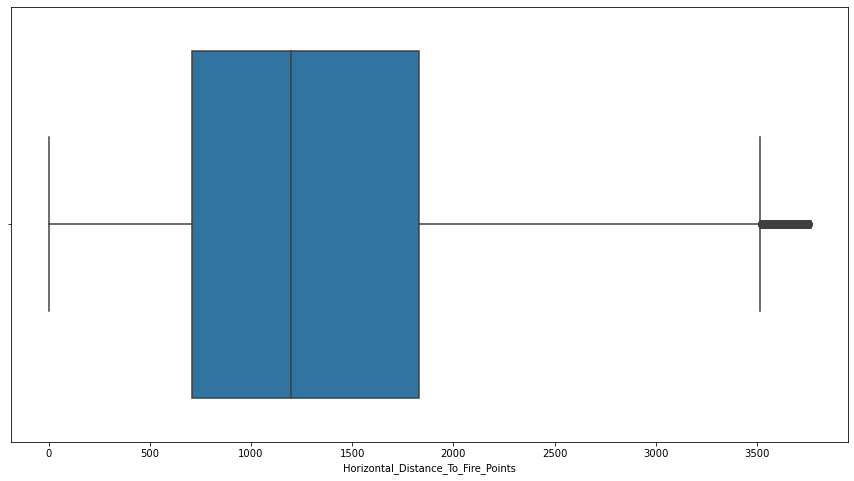

In [27]:
sns.boxplot(df['Horizontal_Distance_To_Fire_Points'])

In [28]:
len(df[df['Slope']>38])

141

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [29]:
import math

In [30]:
df['Hypo_Distances'] = np.sqrt(df['Horizontal_Distance_To_Hydrology'] ** 2 + df['Vertical_Distance_To_Hydrology']**2)

In [31]:
df['Avg_Distance'] = (df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways']) / 2

In [32]:
df['Avg_Distance']

0        1228.500
2        2357.500
3         795.000
4         538.500
5        1492.000
           ...   
249993    722.000
249994    953.000
249996   1139.000
249997    714.500
249998    674.500
Name: Avg_Distance, Length: 201104, dtype: float64

In [33]:
df['Avg_Distance_2'] = (df['Elevation'] + df['Vertical_Distance_To_Hydrology']) / 2

In [34]:
df['Avg_Distance_2']

0        1372.000
2        1693.500
3        1511.000
4        1683.000
5        1429.500
           ...   
249993   1357.000
249994   1338.500
249996   1509.500
249997   1168.000
249998   1281.500
Name: Avg_Distance_2, Length: 201104, dtype: float64

In [35]:
df.drop(columns = ['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], inplace = True)

In [36]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Hypo_Dis

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [37]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
operations = [("scaler", StandardScaler()), ("linearsvc", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [42]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[3402  602    4    0  385   72  690]
 [1310 2119  133    2 1136  289   45]
 [   0   27 2897  889  386 1614    0]
 [   0    0  364 6083    0  276    0]
 [ 151  741  576    0 4254  359    0]
 [   1  174  918  809  686 3803    0]
 [ 515    6    0    0   17    1 4485]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65      5155
           2       0.58      0.42      0.49      5034
           3       0.59      0.50      0.54      5813
           4       0.78      0.90      0.84      6723
           5       0.62      0.70      0.66      6081
           6       0.59      0.60      0.59      6391
           7       0.86      0.89      0.88      5024

    accuracy                           0.67     40221
   macro avg       0.67      0.67      0.66     40221
weighted avg       0.66      0.67      0.67     40221


Train_Set
[[13436  2512    30     0  1568   289  2539]
 [ 5124  8441   576    19  4448  1331   148]
 [    0    91 11645  3760 

In [50]:
y_pred = pipe_model.predict(X_test)
svc_f1 = f1_score(y_test, y_pred,average ='micro')
svc_recall = recall_score(y_test,y_pred,average='micro')
#svc_auc = roc_auc_score(y_test,y_pred,multi_class='ovo')


In [51]:
from yellowbrick.classifier import ClassPredictionError


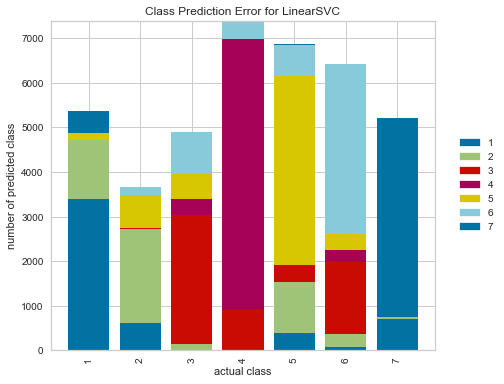

In [52]:
visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [54]:
DT_model = DecisionTreeClassifier(random_state=101)

In [55]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [56]:
y_pred = DT_model.predict(X_test)

In [57]:
DT_model.feature_importances_

array([4.21298168e-01, 2.51495518e-02, 1.44655904e-02, 6.85106325e-02,
       3.30613660e-02, 2.81102826e-02, 1.83213640e-02, 9.29110861e-02,
       1.49888715e-02, 1.14395991e-03, 4.66504003e-03, 5.52444267e-03,
       9.82727299e-04, 9.11032292e-03, 1.86174232e-02, 1.92547024e-02,
       4.95003953e-04, 2.56696133e-03, 0.00000000e+00, 0.00000000e+00,
       2.87486794e-05, 2.94168797e-02, 2.67172958e-03, 9.20794037e-03,
       3.36587716e-03, 3.33140594e-04, 0.00000000e+00, 5.03638822e-04,
       2.12866198e-03, 5.33785511e-05, 3.52588481e-04, 1.61554269e-03,
       1.38024293e-05, 2.28064114e-03, 2.65305925e-03, 2.49571386e-03,
       0.00000000e+00, 8.10274501e-04, 7.57928749e-05, 1.40488795e-04,
       2.17750114e-03, 9.75159051e-04, 2.46053698e-03, 4.31079217e-03,
       2.76043474e-03, 5.31580195e-04, 1.76573285e-04, 0.00000000e+00,
       0.00000000e+00, 1.90487338e-03, 5.22208570e-03, 4.48257118e-04,
       6.78354724e-02, 4.95738646e-02, 2.42974733e-02])

In [58]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.902,0.031,0.933,0.933,0.933,0.933
2,2.990,0.029,0.932,0.932,0.932,0.932
3,2.959,0.031,0.930,0.930,0.930,0.930
4,2.968,0.029,0.930,0.930,0.930,0.930
5,3.207,0.029,0.933,0.933,0.933,0.933
6,3.110,0.030,0.935,0.935,0.935,0.935
7,2.963,0.030,0.933,0.933,0.933,0.933
8,2.914,0.031,0.935,0.935,0.935,0.935
9,3.025,0.031,0.932,0.932,0.932,0.932
10,3.240,0.035,0.933,0.933,0.933,0.933


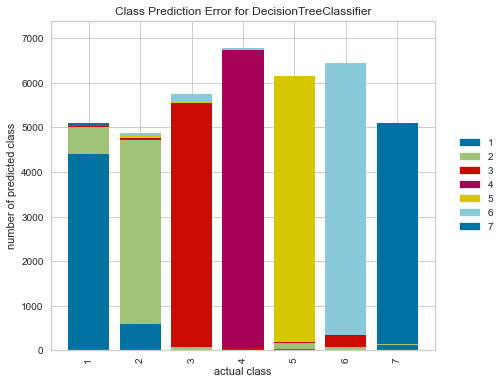

In [50]:
visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [59]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
df_f_i

,Feature Importance
Elevation,0.421
Horizontal_Distance_To_Fire_Points,0.093
Horizontal_Distance_To_Roadways,0.069
Hypo_Distances,0.068
Avg_Distance,0.050
Hillshade_9am,0.033
Soil_Type_10,0.029
Hillshade_Noon,0.028
Aspect,0.025
Avg_Distance_2,0.024


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86      5155
           2       0.85      0.82      0.83      5034
           3       0.94      0.94      0.94      5813
           4       0.99      0.99      0.99      6723
           5       0.97      0.98      0.98      6081
           6       0.95      0.96      0.95      6391
           7       0.97      0.99      0.98      5024

    accuracy                           0.94     40221
   macro avg       0.93      0.93      0.93     40221
weighted avg       0.94      0.94      0.94     40221



In [63]:
dt_f1 = f1_score(y_test, y_pred,average='micro')
dt_recall = recall_score(y_test, y_pred,average='micro')
#dt_auc = roc_auc_score(y_test, y_pred)
#eval_metric(DT_model, X_train, y_train, X_test, y_test)

In [53]:
from sklearn.tree import plot_tree

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred,average='micro')
rf_recall = recall_score(y_test, y_pred,average='micro')
#rf_auc = roc_auc_score(y_test, y_pred)
#eval_metric(rf_model, X_train, y_train, X_test, y_test)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [71]:
xgb_model = XGBClassifier(random_state=42)


In [73]:
xgb_model.fit(X_train,y_train)

[17:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
y_pred = xgb_model.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred,average='micro')
xgb_recall = recall_score(y_test, y_pred,average='micro')
#xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[4369  602    3    0   46    8  127]
 [ 685 3925   83    0  238   96    7]
 [   0   17 5221   73   31  471    0]
 [   0    0    5 6711    0    7    0]
 [   0   23   18    0 6031    9    0]
 [   0   12  188   31   16 6144    0]
 [  26    1    0    0    0    0 4997]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85      5155
           2       0.86      0.78      0.82      5034
           3       0.95      0.90      0.92      5813
           4       0.98      1.00      0.99      6723
           5       0.95      0.99      0.97      6081
           6       0.91      0.96      0.94      6391
           7       0.97      0.99      0.98      5024

    accuracy                           0.93     40221
   macro avg       0.93      0.92      0.92     40221
weighted avg       0.93      0.93      0.93     40221


Train_Set
[[18075  1738    10     0   207    16   328]
 [ 2196 16611   248     0   687   313    32]
 [    0    15 21826   145 

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

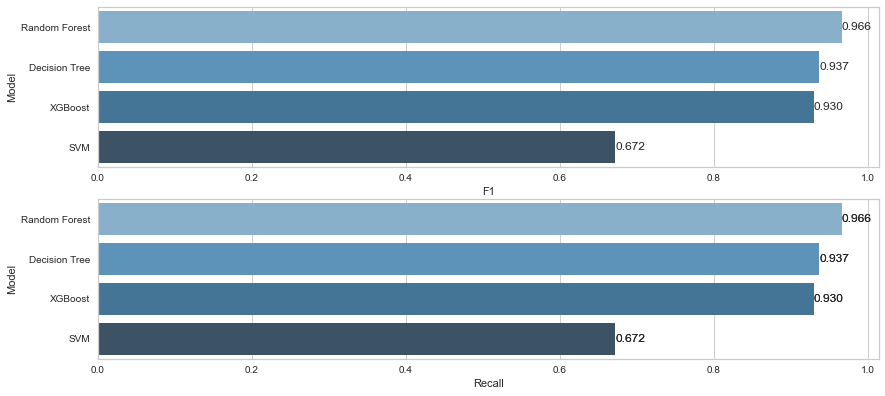

In [76]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest",
                        "XGBoost"],
                        "F1": [svc_f1, dt_f1, rf_f1,xgb_f1],
                        "Recall": [svc_recall, dt_recall, rf_recall,xgb_recall],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

labels(ax)
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___